# Количество бревен и труб

In [2]:
import cv2
import numpy as np
import random
import os
import matplotlib.pyplot as plt

## 1. Посмотрим на данные

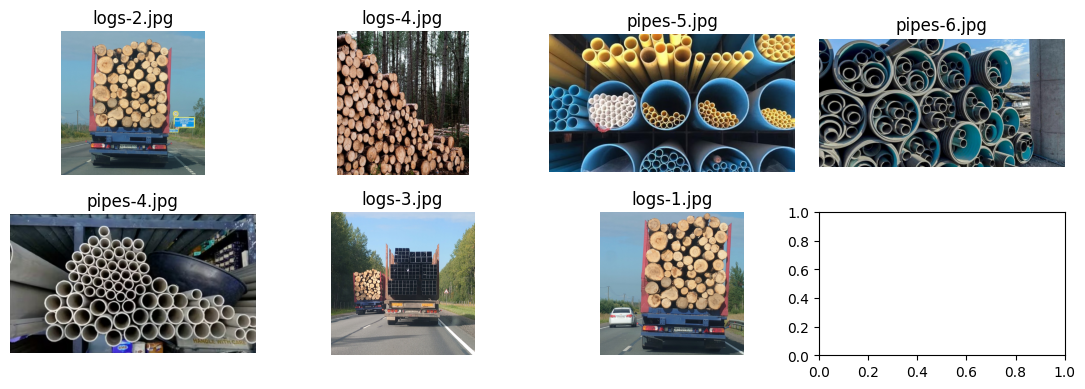

In [5]:
imgs_directory = 'dataset'
all_imgs = os.listdir(imgs_directory)

fig, axes = plt.subplots(nrows=2,
                         ncols=4,
                         figsize=(11, 4))
axes = axes.ravel()

for i, img_name in enumerate(all_imgs):
    # подгружаем файлы
    img_path = os.path.join(imgs_directory, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # визуализация изображения
    axes[i].imshow(img)
    axes[i].set_title(img_name)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

Задача сводится к поиску геометрических примитивов (а именно - окружностей) на изображении

**Алгоритм решения:**
1) Выполним предобработку данных (при необходимости)
2) Воспользуемся преобразованием Хаффа 
3) Посчитаем выделенные окружности

Поскольку изображений немного, будем работать с каждым индивидуально

# 2. Предобработка и преобразование Хаффа

* Переведем изображения в grayscale (т.к. в RGB алгоритм не работает, либо нужно для каждого канала отдельно)
* Применим преобразование Хаффа для окружностей (внутри применяется детектор Canny)
* Посчитаем кол-во окружностей

Дополнительно:
* обрезать изображение при необходимости
* предварительно применить фильтр Гаусса (перед преобразованием Хаффа)

In [176]:
def open_imshow(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

def solution(img_path, method=cv2.HOUGH_GRADIENT, dp=1, minDist=15, param1=100, param2=40,
             minRadius=0, maxRadius=70,
             x_start=None, y_start=None, x_end=None, y_end=None,
             x_kernel=None, y_kernel=None, sigma=None):
    # чтение файла
    img = cv2.imread(img_path)

    # обрезка, если надо
    if x_start:
        img = img[:, x_start:]
    if y_start:
        img = img[y_start:, :]
    if x_end:
        img = img[:, :x_end]
    if y_end:
        img = img[:y_end, :]

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # перевод в grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # дополнительно фильтр Гаусса, если надо
    if x_kernel:
        gray = cv2.GaussianBlur(gray, (x_kernel, y_kernel), sigma)
    
    # применение преобразования Хаффа
    detected_circles = cv2.HoughCircles(
        image=gray,
        method=method,
        dp=dp,
        minDist=minDist,
        param1 = param1,
        param2 = param2,
        minRadius = minRadius, 
        maxRadius = maxRadius
    )

    # подсчет окружностей и визуализация
    pipes_count = 0
    if detected_circles is not None:
        detected_circles = np.uint16(np.around(detected_circles)) # Convert circle metadata to integers

    for points in detected_circles[0, :]:
        a, b, r = points[0], points[1], points[2]

        # нарисуем саму окружность
        cv2.circle(img, (a, b), r, (0, 255, 0), 2)

        # нарисуем центр
        cv2.circle(img, (a, b), 1, (255, 0, 0), 3)

        pipes_count += 1

    print("Количество окружностей:", pipes_count)
    plt.imshow(img)


## 2.1 logs-1

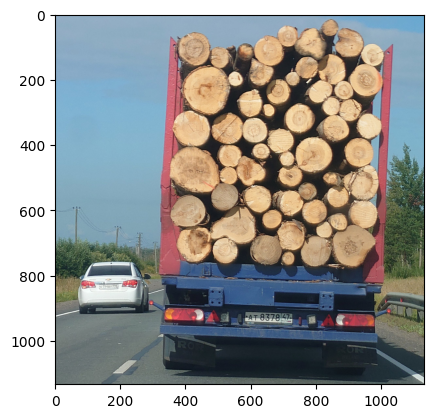

In [92]:
img_path = "dataset/logs-1.jpg"
open_imshow(img_path)

* бревна расположены плотно
* радиус варьируется
* машина сильно мешает

Количество окружностей: 68


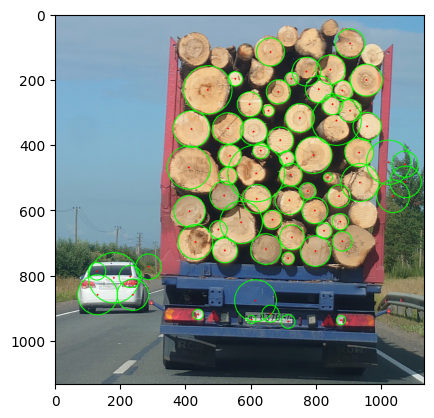

In [93]:
solution(img_path,
         minDist=50,
         param1=500,
         param2=20,
         minRadius=10,
         maxRadius=90)

Количество окружностей: 61


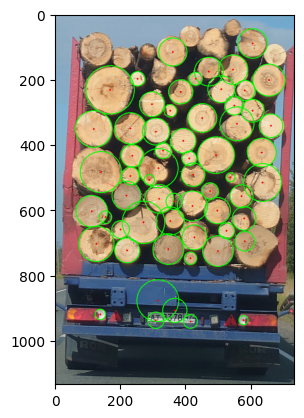

In [108]:
solution(img_path,
         minDist=45,
         param1=495,
         param2=20,
         minRadius=10,
         maxRadius=90,
         x_start=300,
         x_end=-100)

## 2.2 logs-2

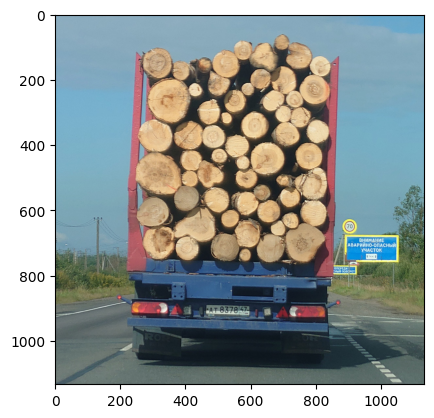

In [192]:
img_path = "dataset/logs-2.jpg"
open_imshow(img_path)

* похоже на прошлое (плотность бревен, радиус)
* тут будут мешать знаки справа

Количество окружностей: 71


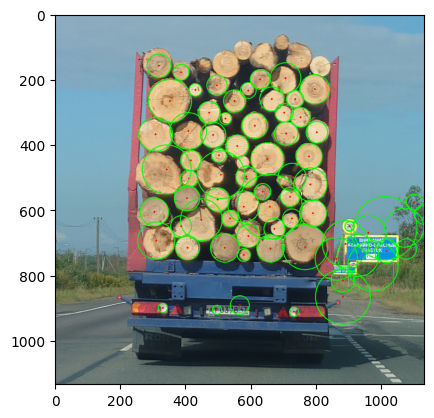

In [205]:
solution(img_path,
         minDist=50,
         param1=380,
         param2=23,
         minRadius=5,
         maxRadius=100)

Количество окружностей: 54


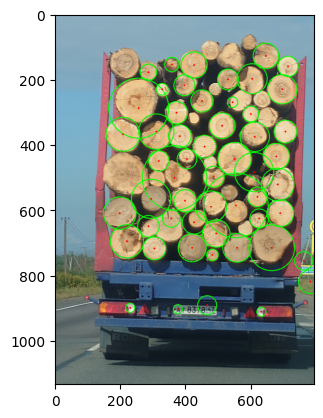

In [ ]:
solution(img_path,
         minDist=65,
         param1=450,
         param2=17,
         minRadius=5,
         maxRadius=100,
         x_start=100,
         x_end=-240)

## 2.3 logs-3

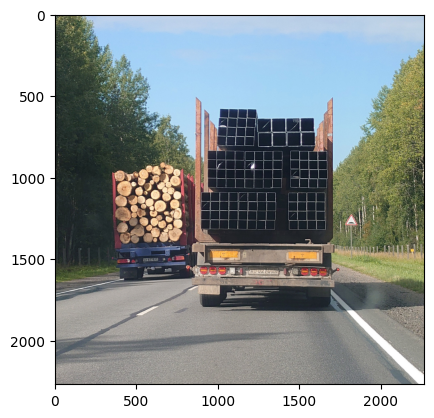

In [208]:
img_path = "dataset/logs-3.jpg"
open_imshow(img_path)

* тут уже будет тяжко без дополнительной очистки шумов с помощью Гаусса

Количество окружностей: 50


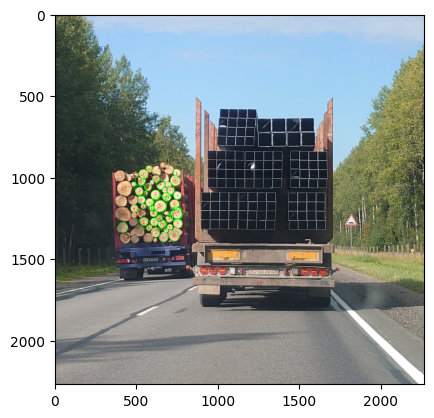

In [222]:
solution(img_path,
         minDist=10,
         param1=300,
         param2=22,
         minRadius=5,
         maxRadius=100,
         x_kernel=7,
         y_kernel=7,
         sigma=3)

## 2.4 logs-4

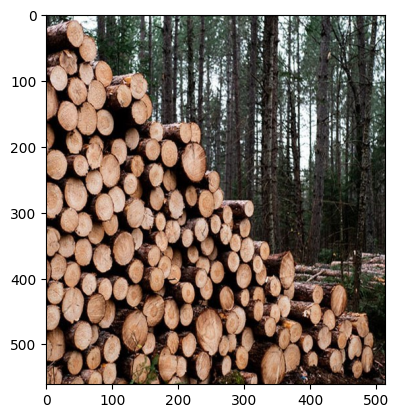

In [224]:
img_path = "dataset/logs-4.jpg"
open_imshow(img_path)

Количество окружностей: 80


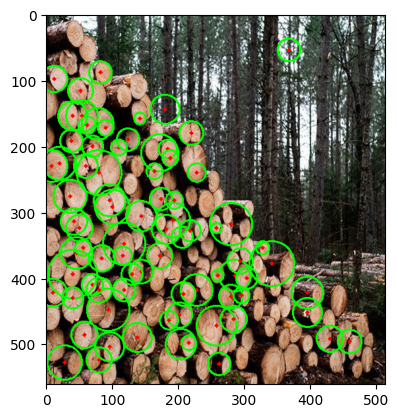

In [305]:
solution(img_path,
         minDist=12,
         param1=220,
         param2=19,
         minRadius=5,
         maxRadius=40,
         x_kernel=9,
         y_kernel=9,
         sigma=2)

## 2.5 pipes-4

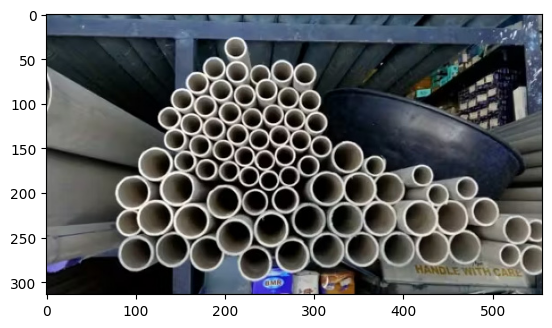

In [306]:
img_path = "dataset/pipes-4.jpg"
open_imshow(img_path)

Количество окружностей: 79


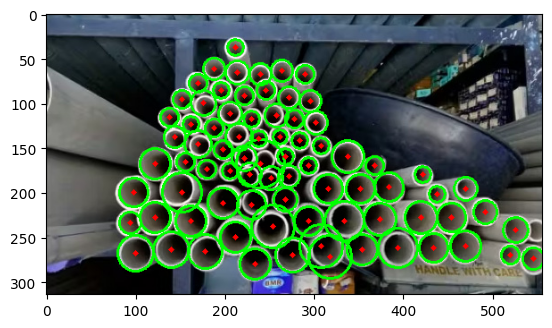

In [314]:
solution(img_path,
         minDist=13,
         param1=330,
         param2=23,
         minRadius=5,
         maxRadius=30)

## 2.6 pipes-5

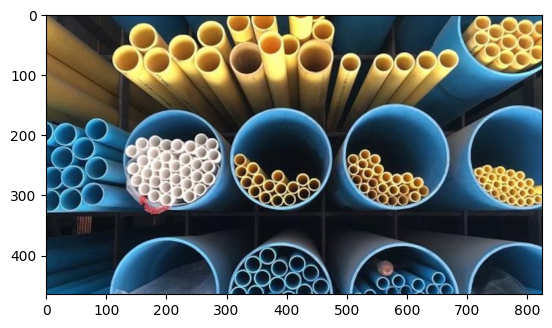

In [315]:
img_path = "dataset/pipes-5.jpg"
open_imshow(img_path)

Количество окружностей: 45


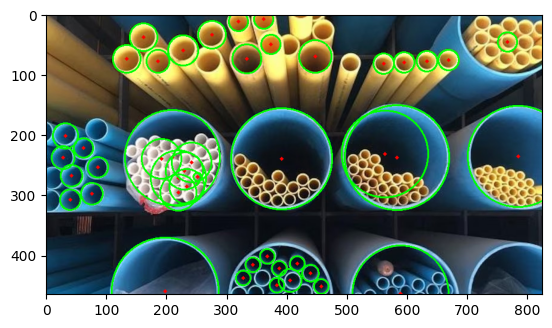

In [394]:
# если искать маленькие + большие
solution(img_path,
         minDist=13,
         param1=220,
         param2=45,
         minRadius=1,
         maxRadius=90,
         x_kernel=3,
         y_kernel=3,
         sigma=1.5)

Количество окружностей: 135


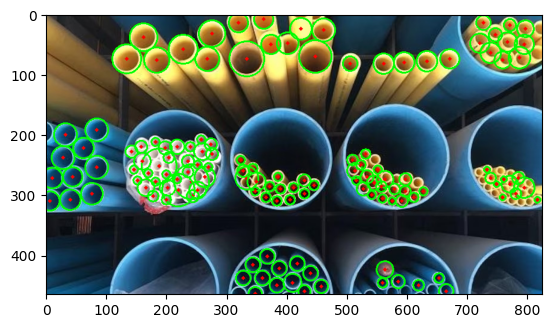

In [437]:
# если искать только маленькие
solution(img_path,
         minDist=13,
         param1=200,
         param2=22,
         minRadius=1,
         maxRadius=30,
         x_kernel=3,
         y_kernel=3,
         sigma=1.70)

## 2.7 pipes-6

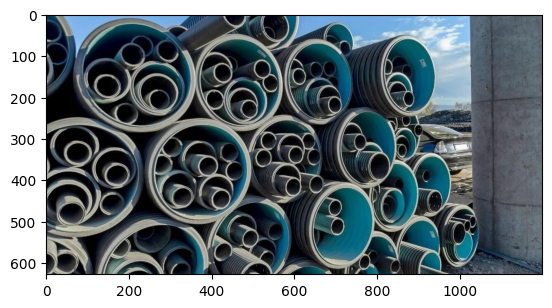

In [438]:
img_path = "dataset/pipes-6.jpg"
open_imshow(img_path)

Количество окружностей: 65


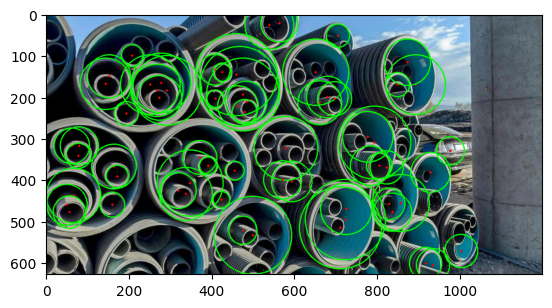

In [456]:
# если искать маленькие + большие
solution(img_path,
         minDist=18,
         param1=200,
         param2=61,
         minRadius=1,
         maxRadius=100,
         x_kernel=3,
         y_kernel=3,
         sigma=0.5)

Количество окружностей: 84


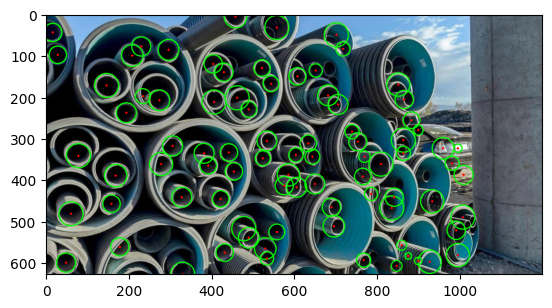

In [458]:
# если искать только маленькие
solution(img_path,
         minDist=25,
         param1=200,
         param2=22,
         minRadius=1,
         maxRadius=30,
         x_kernel=3,
         y_kernel=3,
         sigma=1.70)